Dice are probabilistic objects; roll a d20, and you will get anything in $[1, 20]$ with equal probability. Quantum mechanics is also probabilistic, at least according to some interpretations. We can use a quantum circuit to simulate a dice roll. The idea is simple, just do a measurement on a maximally entangled $n$-qubit system, and you will get one of the $2^n$ possible states.

Let's use a d20 as an example. For a 20 sided die, we need at least 5 bits, $2^{4} = 16$, and $2^5 = 32$. The following circuit will do the trick.

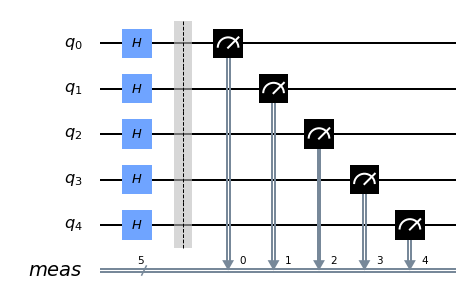

In [9]:
from quantum_dice import QuantumDice

qd = QuantumDice(20)
qc = qd._generate_circuit()
qc.draw("mpl")

The entanglement is produced by applying Hadamard gates to each of those five qubits. When a measurement is made we will get a 5-bit string representing any integer between 0 and 31. Zero is not allowed roll, so we need to add 1 to the result. Another problem is that the maximum allowed roll on a d20 is 20, but here we can get up to 32. One way to solve this is to do the addition modulo 20, and interpreting any resulting 0 as 20. The problem with this solution is that the rolls are no longer of equal probability. Integers in $[1, 12]$ will have twice the probability than integers in $[13, 20]$.  Another way to fix this issue would be to scale the roll, that is divide by 32 and multiply by 20, and then apply the ceiling function to the result. Even in this case the probability distribution will not be perfectly uniform, just a different subset of integers in $[1, 20]$ will have twice the probability as the others.

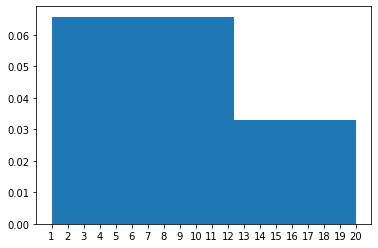

In [3]:
# probability distribution when doing modular addiion

import numpy as np
import matplotlib.pyplot as plt

rolls = [(i + 1) % 20 for i in range(0, 32)]
for i in range(len(rolls)):
    if rolls[i] == 0:
        rolls[i] = 20
xticks = np.arange(1, 21)
x, bins, patches = plt.hist(rolls, bins=20, density=True)
loc, labels = plt.xticks(xticks)

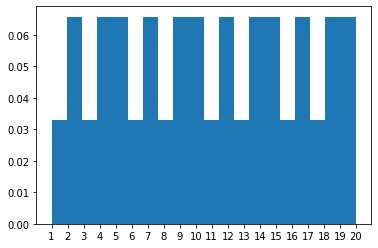

In [8]:
# probability distribution when scaling the result

rolls = [np.ceil(i * 20 / 32) for i in range(1, 33)]
xticks = np.arange(1, 21)
x, bins, patches = plt.hist(rolls, bins=20, density=True)
loc, labels = plt.xticks(xticks)

While this is not ideal, we should keep in mind that physical dice are not ideal either. They are biased due to imperfections from the manufacturing process.

With that disclaimer, let's roll some dice. Instead of an actual quantum computer, we will use Qiskit's `qasm_simulator` for the demonstration.

In [5]:
bases = [2, 4, 6, 8, 10, 12, 20]
for base in bases:
    qd = QuantumDice(base)
    print(f"d{base} roll: ", end="")
    for _ in range(30):
        print(qd.roll(), end=" ")
    print("")

d2 roll: 1 2 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2 2 1 1 1 2 2 1 1 2 1 1 
d4 roll: 2 1 2 1 4 1 2 4 2 2 2 1 2 3 4 1 1 1 2 1 2 3 2 2 1 4 3 2 1 1 
d6 roll: 6 6 1 3 3 5 2 3 6 5 1 4 4 1 2 2 5 2 4 6 2 2 2 2 2 3 6 3 6 5 
d8 roll: 8 1 1 2 4 2 7 8 4 8 5 3 6 4 6 6 5 3 4 3 7 3 6 4 7 7 1 7 1 4 
d10 roll: 3 1 5 3 7 4 4 7 8 1 4 6 6 1 4 1 4 9 5 2 8 6 4 3 10 3 10 6 3 5 
d12 roll: 7 6 4 4 10 2 9 2 2 1 12 8 1 7 2 5 11 2 10 12 2 4 8 2 2 5 1 12 4 3 
d20 roll: 11 17 10 15 9 8 10 10 9 9 8 13 7 6 6 19 11 19 16 9 14 20 19 12 5 1 12 6 6 9 


Since we do not have a quantum computer with more than 5 qubits, d32 is the highest quantum die that we can roll currently.